In [1]:
import math
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Train.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [6]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [7]:
data = data.drop("ID", axis = 1)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


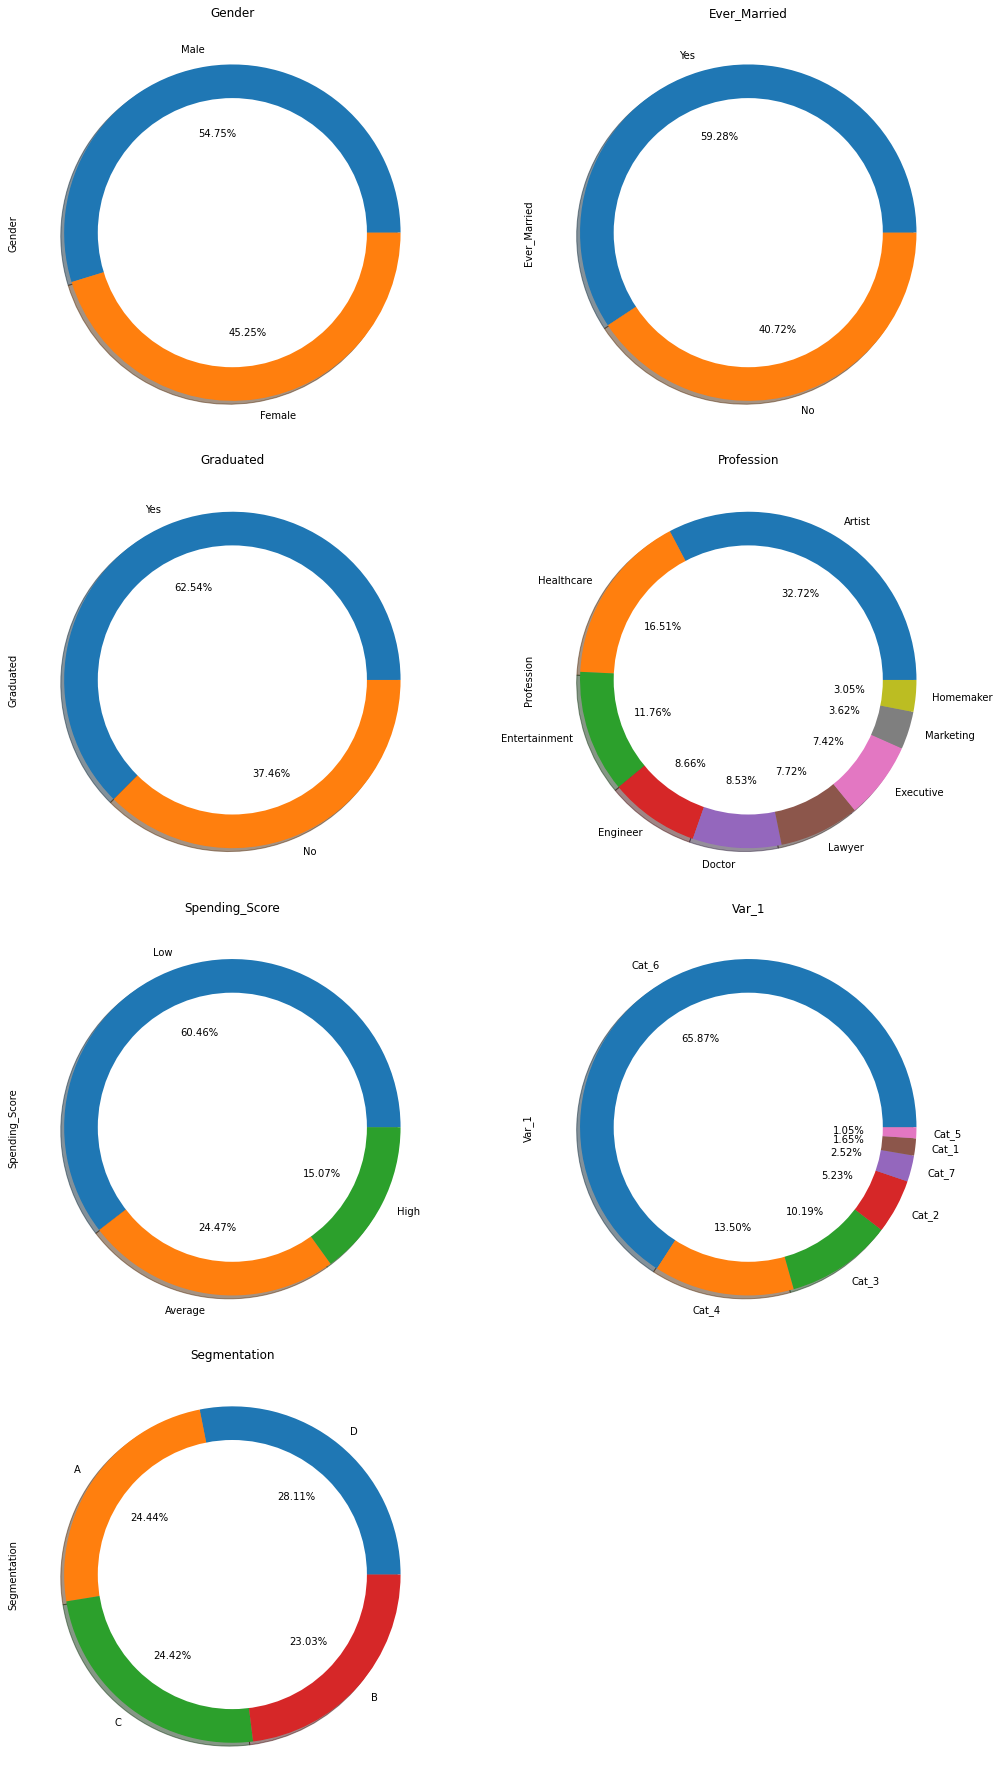

In [8]:
cat_vars = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15,25))

for i, var in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    data[var].value_counts().plot(kind='pie',autopct='%.2f%%',shadow = True)
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(var)


plt.tight_layout()
plt.show()

In [9]:
for col in data.columns:
    print(col, data[col].unique())

Gender ['Male' 'Female']
Ever_Married ['No' 'Yes']
Age [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Graduated ['No' 'Yes']
Profession ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
Work_Experience [ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Spending_Score ['Low' 'Average' 'High']
Family_Size [4. 3. 1. 2. 6. 5. 8. 7. 9.]
Var_1 ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
Segmentation ['D' 'A' 'B' 'C']


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [11]:
for col in data.columns:
    print(col, data[col].unique())

Gender [1 0]
Ever_Married [0 1]
Age [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Graduated [0 1]
Profession [5 2 7 3 0 4 1 6 8]
Work_Experience [ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Spending_Score [2 0 1]
Family_Size [4. 3. 1. 2. 6. 5. 8. 7. 9.]
Var_1 [3 5 6 2 0 1 4]
Segmentation [3 0 1 2]


In [12]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


In [13]:
X = data.drop("Segmentation", axis = 1)
y = data["Segmentation"]

cols = X.columns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

print(X_train.shape, X_test.shape)

(5647, 9) (2421, 9)


In [14]:
model = RandomForestClassifier(n_estimators = 25, random_state = 1, max_leaf_nodes = 9,max_features= None,max_depth = 9 )
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=25, random_state=1)

In [15]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))
print(model.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.25      0.47      0.33       322
           1       0.34      0.38      0.36       490
           2       0.59      0.51      0.54       672
           3       0.79      0.59      0.68       937

    accuracy                           0.51      2421
   macro avg       0.49      0.48      0.48      2421
weighted avg       0.57      0.51      0.53      2421

0.5064023130937629


In [17]:
def prediction(sex, married, age, graduation, profession, experience, score, family, var1):
    attrs = [0]*9
    attrs[0] = sex
    attrs[1] = married
    attrs[2] = age
    attrs[3] = graduation
    attrs[4] = profession
    attrs[5] = experience
    attrs[6] = score
    attrs[7] = family
    attrs[8] = var1
    
    pred = model.predict([attrs])
    string = ''
    
    if pred == 0:
        string = 'Occasional customer'
    elif pred == 1:
        string = 'Discount spender'
    elif pred == 2:
        string = 'Spender'
    else:
        string = 'Lavish spender'
        
    return string

In [18]:
prediction(0, 1, 47, 1, 0, 2, 0, 3, 5)

'Spender'

In [19]:
prediction(0, 1, 88, 1, 7, 1, 0, 4, 5)

'Spender'

In [20]:
prediction(1, 0, 35, 1, 3, 0, 2, 1, 5)

'Occasional customer'

In [21]:
prediction(1, 1, 47, 1, 1, 2, 2, 3, 5)

'Occasional customer'

In [22]:
import pickle
with open("customers.pickle",'wb') as f:
    pickle.dump(model,f)

In [23]:
import json
columns = {'data_columns': [col for col in cols]}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [24]:
tar = {'target_names':['Occasional customer', 'Discount spender', 'Spender', 'Lavish spender']}
with open("targets.json",'w') as f:
    f.write(json.dumps(tar))